
## Reading and Understanding the Data

### importing libraries

In [1]:


import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
%matplotlib inline

### Importing dataset

In [2]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
lead=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### checking for null values

In [7]:
sum_val=lead.isnull().sum()
pd.DataFrame(100*sum_val/lead.shape[0])

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


Below are the columns which has more than 40% of null values:

- Asymmetrique Activity Index	
- Asymmetrique Profile Index	
- Asymmetrique Activity Score	
- Asymmetrique Profile Score
- Lead Quality


### Checking for duplicate values

In [8]:

lead[lead.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates values are present in data set

### Replacing "select" from below columns to NaN as customer has not selected any options

- Specialization
- Lead Profile
- How did you hear about X Education
- City

In [9]:
lead['Specialization'] = lead['Specialization'].replace('Select',np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select',np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select',np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

### Analyzing Lead_Source


GOOGLE is present both in upper and lower case hence converting both to "Google"

In [10]:
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')


In [11]:
lead['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In Lead search column Google has most number of counts and we can assume that most customer will serach through google and come to platform. Hence we can replace Nan value with Google.



In [12]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

In [13]:
lead['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

Lead source have similar values to columns like search, newspaper, magazine etc which indicate where customer saw ad so we can drop this column

### Analyzing How did you hear about X Education


In [14]:
lead['How did you hear about X Education'].unique()

array([nan, 'Word Of Mouth', 'Other', 'Online Search', 'Multiple Sources',
       'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media',
       'SMS'], dtype=object)

How did you hear about X Education has similar values to columns like search, newspaper, magazine etc which indicate where customer saw ad so we can drop this column

In [15]:
lead['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [16]:
lead['Last Activity'].isna().sum()

103

In last activity column number of nul values in 103 and since we don't know customer's last activity will replace it with "no activity"

In [17]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'No activity')

value counts for the column "What is your current Occupation"

In [18]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
sum_val1=lead.isnull().sum()
pd.DataFrame(100*sum_val1/lead.shape[0])

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.000000
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [20]:
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

### Analyzing Lead Quality and Lead Profile 

In [21]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [22]:
lead['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Lead quality and Lead profile has more than 50% of null values and there is no information based on what these values are assigned.


In [23]:
# lead['Lead Quality'].fillna('Might be',inplace=True)

In [24]:
# lead['Lead Quality'].unique()

In [25]:
# lead['Lead Profile'].fillna('Potential Lead',inplace=True)

In [26]:
# lead['Lead Profile'].unique()

In [27]:
sum_val2=lead.isnull().sum()
pd.DataFrame(100*sum_val2/lead.shape[0])

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.000000
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


### list of columns to be droppped 

Below are columns which can be dropped
- Prospect ID	
- Lead Number
- Lead Source 
- How did you hear about X Education
- A free copy of Mastering The Interview
- Last Notable Activity

Prospectid and lead number is a id assigned to each lead which is not useful in analysis

Lead score and how did you hear abot X eductaion will be duplicate when we will create dummy variables as columns like search, newspaper, maganize, recommendation etc already exists 

A free copy of mastering the interview and last notable ativity will be used by leads which are converted


In [28]:
list_of_columns_to_drop=['Prospect ID','Lead Number','Lead Source','How did you hear about X Education','A free copy of Mastering The Interview','Last Notable Activity']

new_lead=lead.drop(columns=list_of_columns_to_drop,axis=1)
new_lead.head()

,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque
0,API,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No
1,API,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No
2,Landing Page Submission,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No
3,Landing Page Submission,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No
4,Landing Page Submission,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No


In [29]:
new_lead.shape

(9240, 31)

In [30]:
column_list=new_lead.columns

In [31]:
for c in column_list:
  print(c, new_lead[c].unique())

Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Do Not Email ['No' 'Yes']
Do Not Call ['No' 'Yes']
Converted [0 1]
TotalVisits [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Total Time Spent on Website [   0  674 1532 ...  603  483  927]
Page Views Per Visit [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.

Below columns has only one value i.e 'No'so dropping it:
- I agree to pay the amount through cheque
- Get updates on DM Content
- Update me on Supply Chain Content
- Receive More Updates About Our Courses 
- Magazine

In [32]:
list_of_columns_with_no=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine']
new_lead.drop(columns=list_of_columns_with_no,axis=1,inplace=True)
new_lead.head()


,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,API,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0
1,API,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0
2,Landing Page Submission,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0
3,Landing Page Submission,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0
4,Landing Page Submission,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0


In [33]:
new_lead.shape

(9240, 26)

In [34]:
sum_val3=new_lead.isna().sum()
pd.DataFrame(100*sum_val3/new_lead.shape[0])

,0
Lead Origin,0.000000
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684
Last Activity,0.000000
Country,26.634199
Specialization,36.580087


## Data Visualisation


### checking for outliers

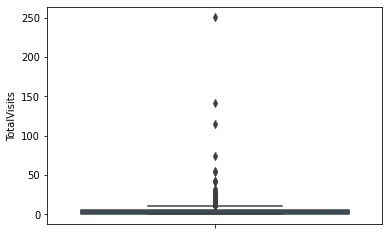

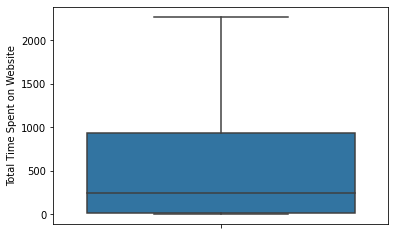

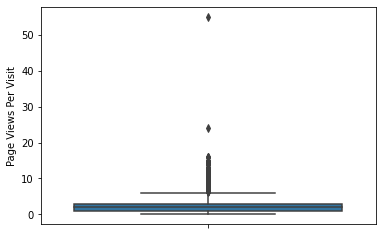

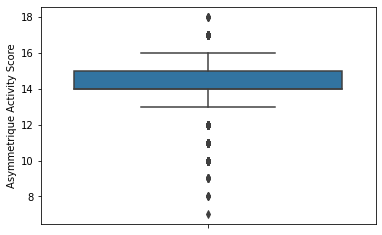

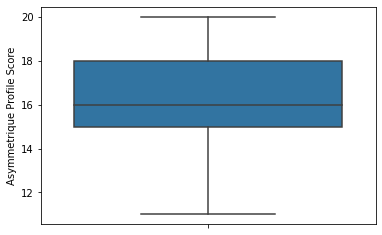

In [35]:
list_of_numerical_variable=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',	 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

for ele in list_of_numerical_variable:
  sns.boxplot(data=new_lead,y=ele)
  plt.show()

### Removing outliers 

Replacing outliers with upper whisker and lower whisker values

In [36]:
def remove_outliers(colname):
  
  quantile_75 = new_lead[colname].quantile(0.75) # 75% quantile value of boxplot i.e. Q3
  quantile_25 = new_lead[colname].quantile(0.25) # 25%  quantile value of boxplot i.e. Q1
  upperlimit =  quantile_75 + (quantile_75 - quantile_25) * 1.5 # calculating upper limit = Q3+1.5(Q1+Q3)
  lowerlimit =  quantile_25 - (quantile_75 - quantile_25) * 1.5 # calculating upper limit = Q1-1.5(Q1+Q3)

  condition = new_lead[colname] < upperlimit
  condition1 = new_lead[colname] > lowerlimit
  new_lead[colname].where(condition,upperlimit,inplace=True)
  new_lead[colname].where(condition1,lowerlimit,inplace=True)

In [37]:
for ele in list_of_numerical_variable:
  remove_outliers(ele)

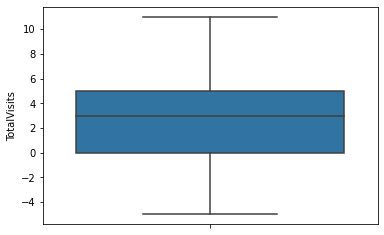

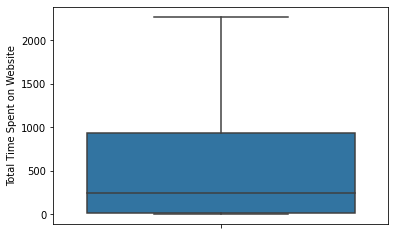

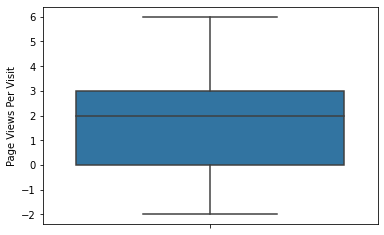

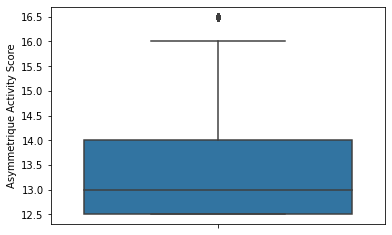

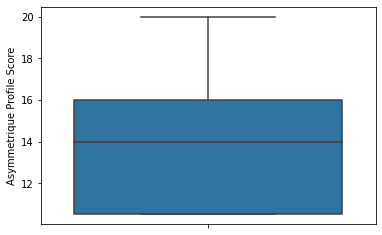

In [38]:
for ele in list_of_numerical_variable:
  sns.boxplot(data=new_lead,y=ele)
  plt.show()

In [39]:

new_lead.columns

Index(['Lead Origin', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

### Converted v/s categorical values

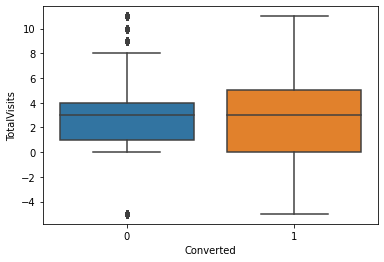

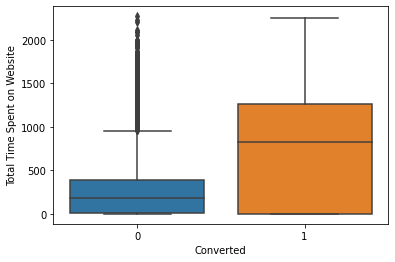

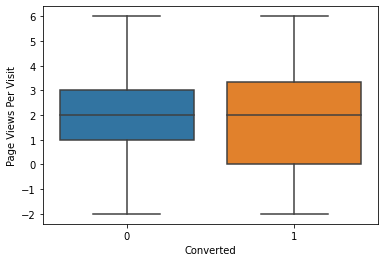

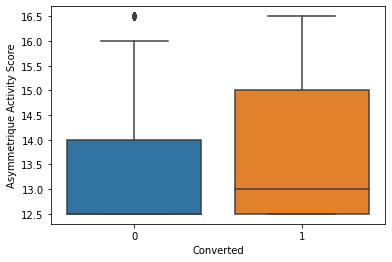

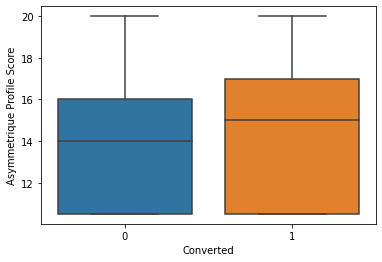

In [40]:
for ele in list_of_numerical_variable:
  sns.boxplot(data=new_lead,y=ele,x='Converted')
  plt.show()

Total Visits, Total Time Spent on Website, Page Views Per Visit and Asymmetrique Activity Score is high for converted leads.


In [41]:
def converted_barplot(col1):
  col2 = 'Converted'
  res = new_lead.groupby([col1,col2])[col2].count().unstack().plot.bar()
  plt.ylabel('Count')
  
  plt.show()


In [42]:
list_of_columns=['Lead Origin', 'Do Not Email', 'Do Not Call',
       'TotalVisits','Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score']


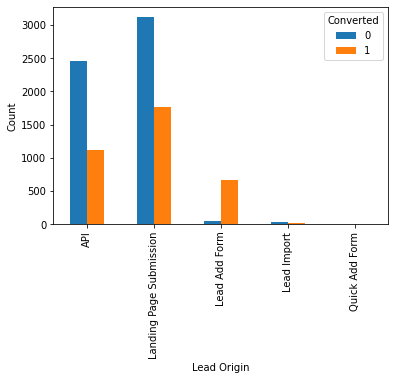

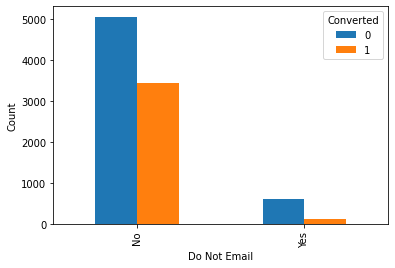

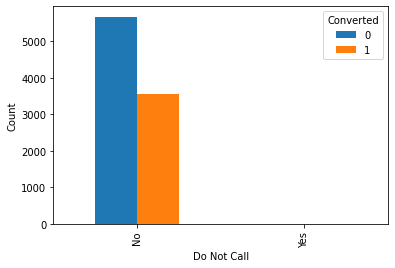

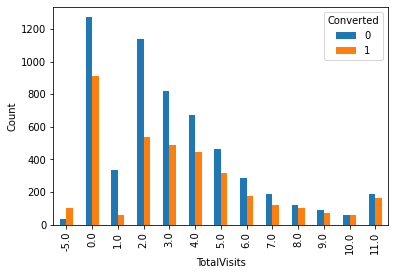

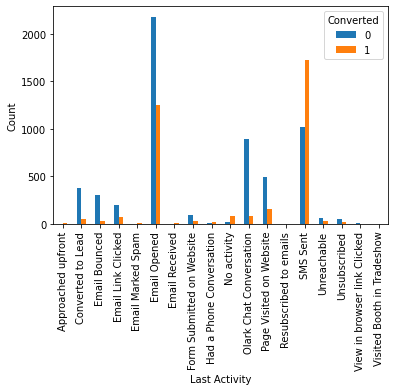

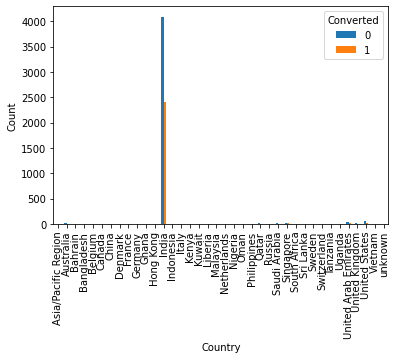

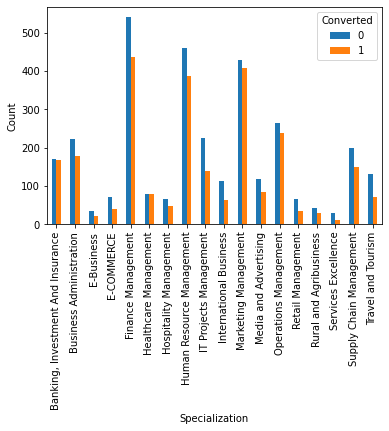

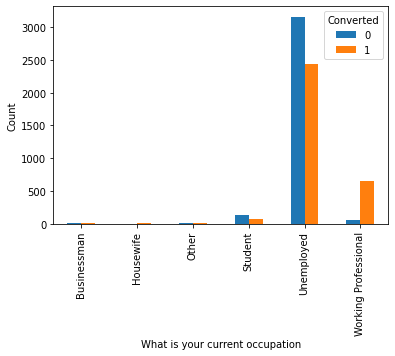

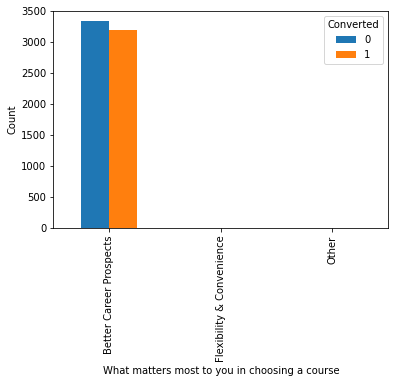

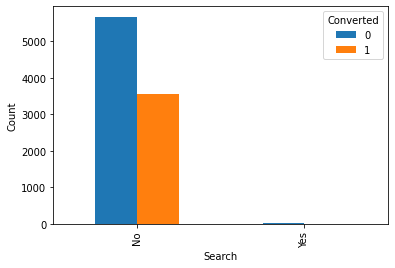

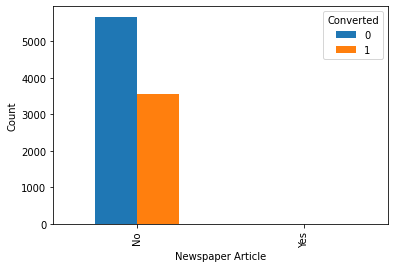

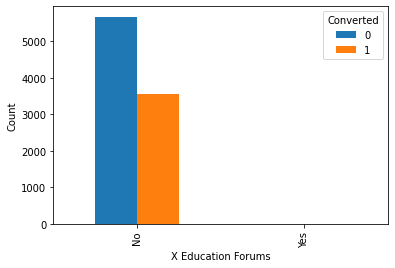

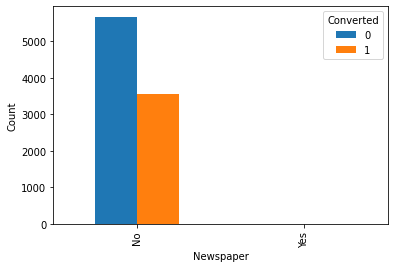

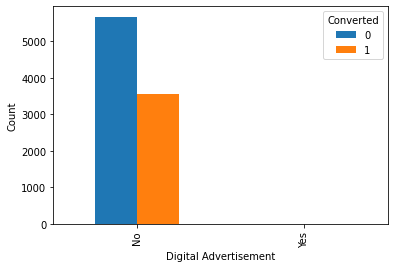

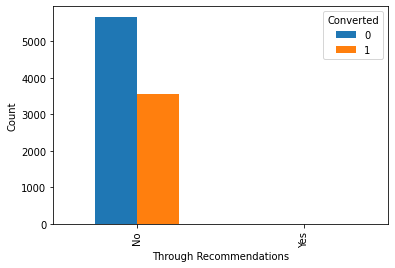

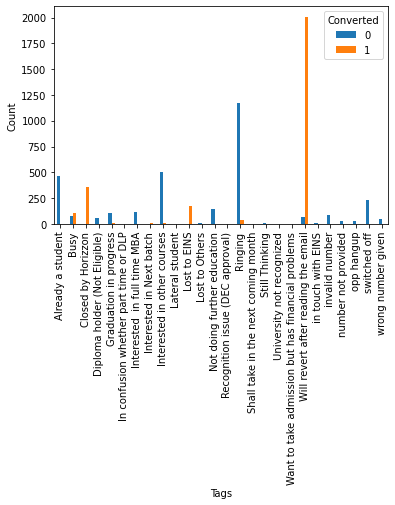

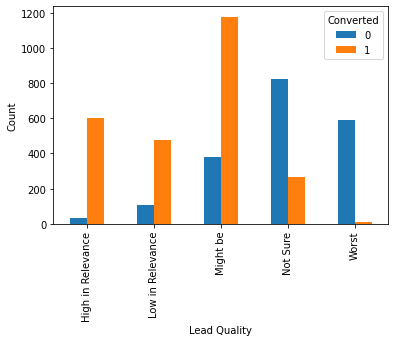

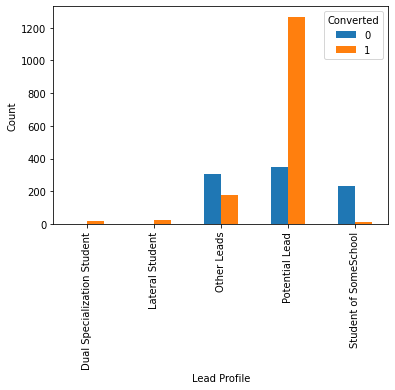

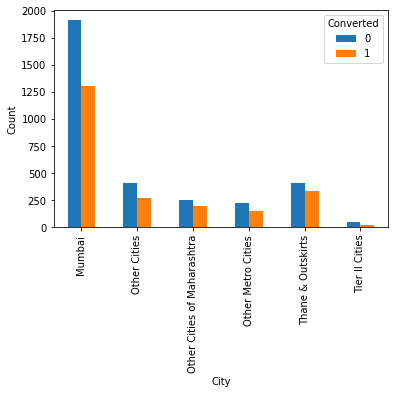

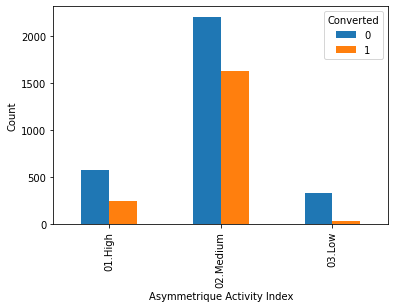

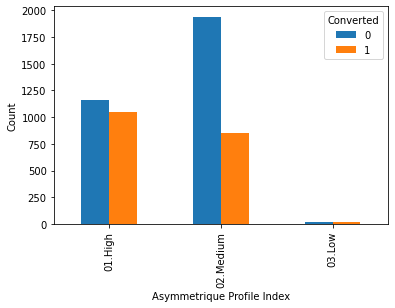

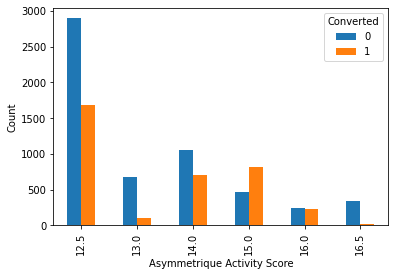

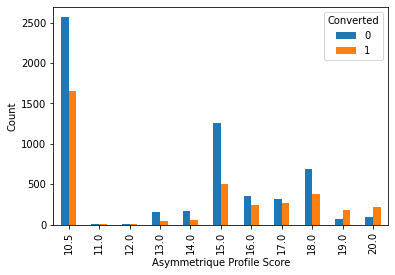

In [43]:
for ele in list_of_columns:
  converted_barplot(ele)

Search, Newspaper, Newspaper Article, X Education Forums, Digital Advertisement, Through Recommendations and Do Not Call has very less count of yes which is no helpful in analysis hence we can drop these columns.

In [44]:
new_lead_columns_to_drop=['Search', 'Newspaper', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement', 'Through Recommendations', 'Do Not Call']

In [45]:
new_lead.drop(columns=new_lead_columns_to_drop,inplace=True)

In [46]:
new_lead.shape

(9240, 19)

In [47]:
sum_val4=new_lead.isnull().sum()
pd.DataFrame(100*sum_val4/new_lead.shape[0])

,0
Lead Origin,0.000000
Do Not Email,0.000000
Converted,0.000000
TotalVisits,0.000000
Total Time Spent on Website,0.000000
Page Views Per Visit,0.000000
Last Activity,0.000000
Country,26.634199
Specialization,36.580087
What is your current occupation,29.112554


Asymmetrique Profile Index and Asymmetrique Activity Index is ordered and it has 45% of null values. We don't have information of what it actually means hence dropping it

In [48]:
new_lead.drop(columns=['Asymmetrique Profile Index','Asymmetrique Activity Index'],inplace=True)

In [49]:
new_lead.shape

(9240, 17)

In [50]:
new_lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [51]:
new_lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [52]:
new_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [53]:
new_lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Dropping bellow columns as they have unstructured data
- country
- city
- Tags
- Last Activity
- Lead Quality
- Lead Profile

Dropping below as they have more than 40% of null values
- Asymmetrique Activity Score
- Asymmetrique Profile Score 

In [54]:
new_lead.drop(columns=[ 'Country', 'City', 'Tags','Asymmetrique Activity Score','Asymmetrique Profile Score', 'Lead Quality','Lead Profile','Last Activity'],inplace=True)

In [55]:
new_lead.shape

(9240, 9)

In [56]:
new_lead.columns

Index(['Lead Origin', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


## Data Preparation

In [57]:
def creating_dummies(X, col):
  dummy1=pd.get_dummies(X[col])
  X=pd.concat([X,dummy1],axis=1)
  X.drop(columns=col,inplace=True)
  return X

In [58]:
list_of_col_to_dummy=['Lead Origin','Specialization', 'What is your current occupation', 'What matters most to you in choosing a course']
for ele in list_of_col_to_dummy:
  new_lead=creating_dummies(new_lead,ele)


In [59]:
new_lead.shape

(9240, 37)

In [60]:
new_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,Better Career Prospects,Flexibility & Convenience,Other
0,No,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,No,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,No,1,2.0,1532,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,No,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,No,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [61]:
sum_val6=new_lead.isnull().sum()
pd.DataFrame(100*sum_val6/new_lead.shape[0])

,0
Do Not Email,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
API,0.0
Landing Page Submission,0.0
Lead Add Form,0.0
Lead Import,0.0
Quick Add Form,0.0


In [62]:
new_lead['Do Not Email']=new_lead['Do Not Email'].replace({'No':0,'Yes':1})

In [63]:
new_lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

## Splitting Data into train and test set

In [64]:
np.random.seed(0)
new_lead_train,new_lead_test=train_test_split(new_lead,train_size=0.7, test_size=0.3,random_state=100)

In [65]:
new_lead_train.shape

(6468, 37)

In [66]:
new_lead_test.shape

(2772, 37)

In [67]:
new_lead_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,Better Career Prospects,Flexibility & Convenience,Other
1871,0,0,0.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6795,0,0,4.0,487,1.33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3516,0,0,5.0,106,2.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8105,0,0,5.0,1230,5.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3934,0,0,0.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [68]:
new_lead_train.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,Better Career Prospects,Flexibility & Convenience,Other
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.381262,3.089827,483.875850,2.184306,0.387137,0.528139,0.079468,0.005102,0.000155,0.035096,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.000928,0.001391,0.001237,0.021027,0.605133,0.077613,0.704855,0.000309,0.000155
std,0.268799,0.485734,3.034843,546.565663,1.847830,0.487133,0.499246,0.270489,0.071252,0.012434,0.184036,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.030445,0.037279,0.035150,0.143484,0.488860,0.267582,0.456143,0.017583,0.012434
min,0.000000,0.000000,-5.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,926.500000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Scaling using MinMaxScaler for total view, page view and total timespent on website

In [69]:
scaler=MinMaxScaler()

scaling train set

In [70]:
list_of_columns_to_scale=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
new_lead_train[list_of_columns_to_scale]=scaler.fit_transform(new_lead_train[list_of_columns_to_scale])

In [71]:
new_lead_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,Better Career Prospects,Flexibility & Convenience,Other
1871,0,0,0.3125,0.000000,0.25000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6795,0,0,0.5625,0.214349,0.41625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3516,0,0,0.6250,0.046655,0.56250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8105,0,0,0.6250,0.541373,0.87500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3934,0,0,0.3125,0.000000,0.25000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


Scaling test set

In [72]:
new_lead_test[list_of_columns_to_scale]=scaler.transform(new_lead_test[list_of_columns_to_scale])
new_lead_test.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,Better Career Prospects,Flexibility & Convenience,Other
4269,0,1,0.8125,0.444982,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,1,0.3125,0.000000,0.250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7766,0,1,0.6250,0.025968,0.875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
9199,0,0,0.3125,0.000000,0.250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4359,0,1,0.3125,0.000000,0.250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [73]:
y_train=new_lead_train.pop('Converted')
X_train=new_lead_train

In [74]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,Better Career Prospects,Flexibility & Convenience,Other
1871,0,0.3125,0.000000,0.25000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6795,0,0.5625,0.214349,0.41625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3516,0,0.6250,0.046655,0.56250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8105,0,0.6250,0.541373,0.87500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3934,0,0.3125,0.000000,0.25000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [75]:
y_train.value_counts()

0    4002
1    2466
Name: Converted, dtype: int64

In [76]:
y_test=new_lead_test.pop('Converted')
X_test=new_lead_test

In [77]:
y_test.value_counts()

0    1677
1    1095
Name: Converted, dtype: int64

## RFE

In [78]:
logreg=LogisticRegression(random_state=0)

In [79]:
rfe = RFE(logreg)            
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('API', False, 12),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Quick Add Form', False, 18),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', False, 6),
 ('E-Business', False, 8),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', False, 16),
 ('Human Resource Management', False, 5),
 ('IT Projects Management', True, 1),
 ('International Business', False, 14),
 ('Marketing Management', False, 4),
 ('Media and Advertising', True, 1),
 ('Operations Management', False, 3),
 ('Retail Management', False, 15),
 ('Rural and Agribusiness', True, 1),
 ('Services Excellence', False, 13),
 ('Supply Chain Management', False, 7),
 ('Travel and Tourism', False, 2),
 ('Businessman', False, 9),
 ('Housewife', True,

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Landing Page Submission', 'Lead Add Form',
       'Lead Import', 'Banking, Investment And Insurance', 'E-COMMERCE',
       'Finance Management', 'Healthcare Management', 'IT Projects Management',
       'Media and Advertising', 'Rural and Agribusiness', 'Housewife', 'Other',
       'Working Professional', 'Better Career Prospects'],
      dtype='object')

In [84]:
X_train.columns[~rfe.support_]

Index(['API', 'Quick Add Form', 'Business Administration', 'E-Business',
       'Hospitality Management', 'Human Resource Management',
       'International Business', 'Marketing Management',
       'Operations Management', 'Retail Management', 'Services Excellence',
       'Supply Chain Management', 'Travel and Tourism', 'Businessman',
       'Student', 'Unemployed', 'Flexibility & Convenience', 'Other'],
      dtype='object')

In [85]:
y_test_pred=rfe.predict(X_test)

In [86]:
y_test_pred

array([0, 1, 1, ..., 0, 0, 1])

## ROC 

In [94]:
y_test_pred_prob = rfe.predict_proba(X_test)

print(rfe.classes_)
# print(y_test_pred_prob)

# index_class_1 = rfe.classes_.find
# print(index_class_1)


y_test_pred_prob_1 = y_test_pred_prob[:,[1]].flatten()
# Class 1 probabilities list
print(y_test_pred_prob_1)

[0 1]
[0.32294703 0.87054502 0.76092558 ... 0.23707856 0.19083521 0.87054502]


In [95]:
T=np.arange(0,1,0.001) # array of threshold between 0 to 1

def compute_tpr_fpr(y_prob , t=0.5):
  '''
     Calculating TPR and FPR on the basis of different threshold
  '''

  # predicting 0 0or 1 based on threshold
  y_test_prediction_t = list(map(lambda x : 1 if x else 0,   y_prob > t)) 

  tp = 0
  fp = 0
  tn = 0
  fn = 0
  #
  for yp, yt in list(zip(y_test_prediction_t, y_test)):
    if yp == yt:
      if yt == 1:
        tp = tp + 1
      else:
        tn = tn + 1
    else:
      if yp == 1:
        fp = fp + 1
      else:
        fn = fn + 1
  
  # sensitivity - tpr
  tpr = tp / ( tp + fn )
  # precision
  precision = tp / ( tp + fp )
  # specificity 
  specificity = tn / ( tn + fp )
  # accuracy
  accuracy = ( tp + tn ) / ( tp + tn + fp + fn )
  fpr = fp / ( fp + tn )
  

  return (tpr, fpr, precision, specificity, accuracy)



In [96]:
def measure_performances(thresholds, y_pred_prob):
  tpr_fpr_list = list(map(lambda t : compute_tpr_fpr(y_pred_prob, t), thresholds))

# X is fpr 
  fpr_X = [x[1] for x in tpr_fpr_list]
  tpr_Y = [x[0] for x in tpr_fpr_list]
  precision_Y = [x[2] for x in tpr_fpr_list]
  specificity_Y = [x[3] for x in tpr_fpr_list]
  accuracy_Y = [x[4] for x in tpr_fpr_list]
  return (fpr_X, tpr_Y, precision_Y, specificity_Y, accuracy_Y)
 

## Calulating AUC and plotting ROC

0.853342155349164
0.853342155349164
0.8532800744970226


Text(0.8, 0, 'AUC= 0.85')

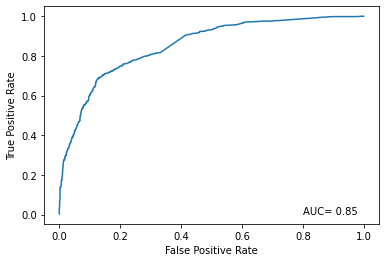

In [97]:

fpr_X, tpr_Y, precision_Y, specificity_Y, accuracy_Y = measure_performances(T, y_test_pred_prob_1)
plt.plot(fpr_X, tpr_Y)

print(-np.trapz(y = tpr_Y , x = fpr_X))

print(metrics.auc(x = fpr_X, y = tpr_Y))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

print(metrics.roc_auc_score(y_true = y_test, y_score = y_test_pred_prob_1))
auc_value=round(metrics.roc_auc_score(y_true = y_test, y_score = y_test_pred_prob_1),2)
text="AUC= "+ str(auc_value)

plt.text(0.8,0,text)

## Model's graph for different performance metrics

In [98]:


def find_optimal_threshold(thresholds, tpr, precision, accuracy, fitness_func = None):
  arr1 = np.array(tpr)
  arr2 = np.array(precision)
  arr3 = np.array(accuracy)
  def default_fitfunc():
    return np.square(arr1-arr2) + np.square(arr3-arr2) + np.square(arr1-arr3)
  err = (default_fitfunc if fitness_func is None else fitness_func)()
  
  index_min_err = np.argmin(err)

  return (thresholds[index_min_err], index_min_err)


In [99]:
optimal_threshold, index_optimal_threshold = find_optimal_threshold(T, tpr_Y, precision_Y, accuracy_Y)

print(optimal_threshold)

0.35000000000000003


In [164]:
def plot_performance(fpr, tpr, precision, accuracy, index_optimal_threshold):
  plt.plot(fpr, tpr,color='b', label = "True positivity rate aka sensitivity")
  plt.plot(fpr, precision,color='r', label = "Precision")
  plt.plot(fpr, accuracy,color='g' , label = "Accuracy")

  x_opt_threshold = np.ones(100) * fpr_X[index_optimal_threshold]
  y_opt_threshold = np.arange(start = 0, stop = 1, step = 0.01)

  plt.plot(x_opt_threshold, y_opt_threshold, color = 'black', marker = '.', label= 'level of optimal threshold')
  plt.legend()
  plt.xlabel('False Positive Rate')
  plt.show()

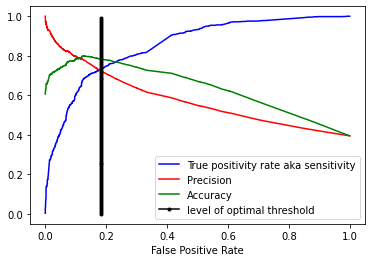

In [165]:
plot_performance(fpr_X, tpr_Y, precision_Y, accuracy_Y, index_optimal_threshold)

In [102]:
# Sensitivity at optimal threshold
tpr_Y[index_optimal_threshold]

0.7342465753424657

In [103]:
rfe.get_params()

{'estimator': LogisticRegression(random_state=0),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 0,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'importance_getter': 'auto',
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0}

In [104]:
list_from_rfe_to_drop=['API', 'Quick Add Form', 'Business Administration', 'E-Business',
       'Hospitality Management', 'Human Resource Management',
       'International Business', 'Marketing Management',
       'Operations Management', 'Retail Management', 'Services Excellence',
       'Supply Chain Management', 'Travel and Tourism', 'Businessman',
       'Student', 'Unemployed', 'Flexibility & Convenience', 'Other']
def drop_column(col):
  X_train.drop(columns=col,axis=1,inplace=True)
  X_test.drop(columns=col,axis=1,inplace=True)
  if col not in X_train.columns:
    print(f'Dropped {col} from training set')

  if col not in X_test.columns:
    print(f'Dropped {col} from test set')

Dropping columns which are not dependent variables after RFE

In [105]:
for ele in list_from_rfe_to_drop:
  drop_column(ele)

Dropped API from training set
Dropped API from test set
Dropped Quick Add Form from training set
Dropped Quick Add Form from test set
Dropped Business Administration from training set
Dropped Business Administration from test set
Dropped E-Business from training set
Dropped E-Business from test set
Dropped Hospitality Management from training set
Dropped Hospitality Management from test set
Dropped Human Resource Management from training set
Dropped Human Resource Management from test set
Dropped International Business from training set
Dropped International Business from test set
Dropped Marketing Management from training set
Dropped Marketing Management from test set
Dropped Operations Management from training set
Dropped Operations Management from test set
Dropped Retail Management from training set
Dropped Retail Management from test set
Dropped Services Excellence from training set
Dropped Services Excellence from test set
Dropped Supply Chain Management from training set
Dropped 

In [106]:
X_train.shape

(6468, 17)

In [107]:
logreg1=LogisticRegression()
logreg1.fit(X_train,y_train)

LogisticRegression()

In [108]:
logreg1.coef_

array([[-1.25365454,  1.14904249,  4.05116036, -0.98893622, -0.52752089,
         3.07480703, -0.66932643,  0.42366266,  0.41570342,  0.35702017,
         0.39343141,  0.35564198,  0.38418087,  0.57914904,  1.4063791 ,
         2.47985921,  1.20905377]])

In [109]:
y_test_pred_proba_2 = logreg1.predict_proba(X_test)[:, 1].flatten()

In [110]:
logreg1.classes_

y_test_pred_proba_2

array([0.32249341, 0.87057024, 0.76083353, ..., 0.23707251, 0.19042712,
       0.87057024])

0.35000000000000003


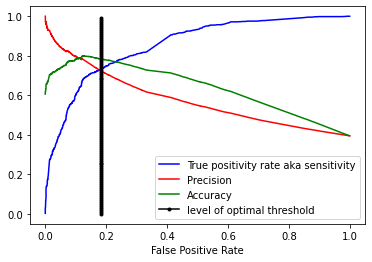

In [166]:
fpr_X1, tpr_Y1, precision_Y1, specificity_Y1, accuracy_Y1 = measure_performances(T, y_test_pred_proba_2)

optimal_threshold1, index_optimal_threshold1 = find_optimal_threshold(T, tpr_Y1, precision_Y1, accuracy_Y1)

print(optimal_threshold1)

plot_performance(fpr_X1, tpr_Y1, precision_Y1, accuracy_Y1, index_optimal_threshold1)

In [112]:
# Sensitivity 
tpr_Y1[index_optimal_threshold1]

0.7342465753424657

In [113]:
accuracy_Y1[index_optimal_threshold1]

0.7839105339105339

Model has sensitivity of 73% and accuracy of 78%

## Finding out top features on basis of subjective questions 1 and 2

In [114]:
def features_by_importance(model):
  feature_coeff = list(zip(model.feature_names_in_,model.coef_[0]))
  feature_coeff.sort(key = lambda x : x[1], reverse = True)
  return feature_coeff

features_by_importance(logreg1)


[('Total Time Spent on Website', 4.051160358513626),
 ('Lead Add Form', 3.0748070335055173),
 ('Working Professional', 2.4798592136069857),
 ('Housewife', 1.4063790975917383),
 ('Better Career Prospects', 1.209053774775937),
 ('TotalVisits', 1.1490424905331431),
 ('Rural and Agribusiness', 0.5791490404023271),
 ('Banking, Investment And Insurance', 0.4236626594932076),
 ('E-COMMERCE', 0.415703424991271),
 ('Healthcare Management', 0.3934314097073532),
 ('Media and Advertising', 0.3841808686012421),
 ('Finance Management', 0.3570201718839182),
 ('IT Projects Management', 0.35564198047504425),
 ('Landing Page Submission', -0.5275208925834867),
 ('Lead Import', -0.6693264310607548),
 ('Page Views Per Visit', -0.9889362197859566),
 ('Do Not Email', -1.2536545387097835)]

## Calculations for sujection questions 3 & 4

In [152]:
# Sensitive - maximize

tpr_range = [0.9, 0.95, 0.97, 0.99]
def find_threshold_accuracy(thresholds,tpr_arr,target_tpr,accuracy_arr):
  
  thres = 0
  accuracy = 0
  false_negative_rate = 0
  i = 0
  # if target_tpr in tpr_arr:
  #   i = tpr_arr.index(target_tpr)

  target_index = np.argmin(np.square(np.array(tpr_arr) - target_tpr))
  thres = thresholds[target_index]
  accuracy = accuracy_arr[target_index]
  false_negative_rate=1-target_tpr

  return (target_tpr, round(thres,3), round(accuracy,3), round(false_negative_rate,3))

In [154]:
l=[]
for ele in tpr_range:
  l.append(find_threshold_accuracy(T,tpr_Y1,ele, accuracy_Y1))

In [155]:
l

[(0.9, 0.237, 0.714, 0.1),
 (0.95, 0.178, 0.661, 0.05),
 (0.97, 0.133, 0.62, 0.03),
 (0.99, 0.083, 0.482, 0.01)]

In [157]:
pd.DataFrame(data=l,columns=['tpr','threshold','accuracy','fnr'])

,tpr,threshold,accuracy,fnr
0,0.90,0.237,0.714,0.10
1,0.95,0.178,0.661,0.05
2,0.97,0.133,0.620,0.03
3,0.99,0.083,0.482,0.01


In [160]:
fpr_range = [0.01, 0.02, 0.05, 0.1]
def thres_acc(thresholds, accurancy_arr, fpr_arr, fpr_parameter):
  

  fpr_index = np.argmin(np.square(np.array(fpr_arr)-fpr_parameter))
  thres = thresholds[fpr_index]
  accuracy = accurancy_arr[fpr_index]

  return(fpr_parameter, round(thres,3), round(accuracy,3))

In [163]:
# func=thres_acc(T, accuracy_Y1, fpr_X1)

def map_fpr_func(x):
  return thres_acc(T, accuracy_Y1, fpr_X1, x)

pd.DataFrame(data=list(map(map_fpr_func,fpr_range)),columns=['fpr','threshold','accuracy'])

,fpr,threshold,accuracy
0,0.01,0.871,0.675
1,0.02,0.831,0.711
2,0.05,0.719,0.738
3,0.10,0.534,0.781
